# Predicting the Types of Chest Pain

>## Authors: Derek, Eric, & Selina

### Introduction

Heart disease include several types of heart conditions which affect the heart. 1 in 12 Canadian above age 20 live with heart disease (Canadian Chronic Disease Surveillance System (CCDSS), 2017). There are many reasons that cause heart diseases such as high blood pressure, high blood cholesterol, and other behaviours that are harmful to our bodies. Common symptoms of heart disease is chest pain. Heart-related chest pain is pressure or tightness generally caused by reduced blood flow to the heart. Our project focuses on factors that lead to chest pain. The four chest pains are classifed as, typical angina, atypical angina, non-anginal pain, and asymptomatic chest pain. The predictive question of classification we will answer is : Given the maximum heart rate achieved(thalach) and resting blood pressure(trestbps), can we predict the type of chest pain individual will have? We downloaded the dataset from the UC Irvine Machine Learning Repository on heart disease (UCI Machine Learning Repository: Heart Disease Data Set, 1988), we will combine two heart disease datasets collected from two different countries, the two countries are celveland and switzerland. The columns are the same but with different data. Since the size on one dataset is smaller, it could be not enough if we use on predicting the chest pain type.

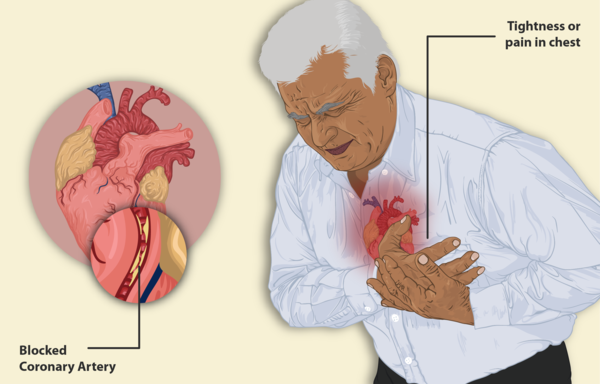

### About the Dataset
This is a grouped dataset from two different countries, which are celveland and switzerland. This entire database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. Here are the 14 columns used:

1. Age (in years)
2. Sex
    - 1 = male
    - 2 = female
3. Chest Pain Type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
4. Resting Blood Pressure (in mmHg)
5. Cholesterol (serum cholesterol in mg/dl)
6. Fasting Blood Sugar (> 120 mg/dl)
    - 0 = false
    - 1 = true
7. Resting Electrocardiographic Results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. Maximum Heart Rate Achieved (beats per minute)
9. Exercise Induced Angina
    - 1 = yes
    - 0 = no
10. ST depression induced by exercise relative to rest
11. The Slope of the Peak Exercise ST Segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
12. Number of Major Vessels Coloured by Flourosopy
13. Thalassemia
    - Value 3: normal
    - Value 6: fixed defect
    - Value 7: reversable defect
14. Diagnosis of Heart Disease
    - Value 0: < 50% diameter narrowing
    - Value 1: > 50% diameter narrowing

### Methods

Firstly, we combined two datasets of different countries:Celveland and Switzerland. The reason for combining two datasets is to increase our data size in order to get a higher accuracy and create a better model. We will use the maximum achieved heart rate and resting blood pressure columns as predictors because these variables are the most commonly associated measures for chest pain. Here are the methods we will use:

1.Reading and Wrangling the Dataset from web.

2.Visualize the relationship between predictors and strata by using histogram and scatterplot.

3.Split the Test and Train data.

4.Summarise observations and mean of our predictors and class.

5.Build classifier by using Knn classification algorithm.

6.Discussion, explanation and results.

### Reading, Cleaning, and Wrangling the Dataset

In [83]:
#Install the packages for using the function step_upsample
install.packages("themis")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [84]:
library(dplyr)
library(readxl)
library(tidyverse)
library(themis)
library(GGally)

In [87]:
# Loading the dataset
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_disease_data_cl <- read_csv(url, col_names = FALSE, na = c("?")) |>
    setNames(c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")) |>
    mutate(cp = as_factor(cp)) |>
    drop_na(trestbps) |>
    drop_na(thalach) |>
    filter(trestbps != 0) |>
    filter(thalach != 0)
#Cleveland's heart disease dataset

url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data"
heart_disease_data_sw <- read_csv(url, col_names = FALSE, na = c("?")) |>
    setNames(c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")) |>
    mutate(cp = as_factor(cp)) |>
    drop_na(trestbps) |>
    drop_na(thalach) |>
    filter(trestbps != 0) |>
    filter(thalach != 0)
#Switzerland's heart disease dataset

heart_disease_combined_dataset <- rbind(heart_disease_data_cl, heart_disease_data_sw) # use rbind to combine the two datasets
heart_disease_data <- heart_disease_combined_dataset
head(heart_disease_data, n = 5)#Only shows 5 rows of the dataset


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


### Selecting Only the Columns Used

In [89]:
heart_disease_dataset <- heart_disease_data |>
select(cp, trestbps, thalach)
head(heart_disease_dataset, n = 5)

cp,trestbps,thalach
<fct>,<dbl>,<dbl>
1,145,150
4,160,108
4,120,129
3,130,187
2,130,172


### Splitting the Testing and Training Dataset

In [90]:
set.seed(1)
library(tidymodels)

heart_disease_split <- initial_split(heart_disease_dataset, prop = 0.75, strata = cp)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

### Summarizing & Reporting the Number of Observations and Percentages in Each Class in the Training Set

In [93]:
heart_disease_observations <- heart_disease_train |>
                      group_by(cp) |>
                      summarize(n = n()) |>
                    mutate(percent = 100 * n / nrow(heart_disease_train))
heart_disease_observations

cp,n,percent
<fct>,<int>,<dbl>
1,17,5.362776
2,41,12.933754
3,78,24.605678
4,181,57.097792


### Summarize the means of the predictor variables & shows how many rows have missing data

In [94]:
heart_disease_exploratory <- read_csv(url, col_names = FALSE, na = c("?")) |>
    setNames(c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")) |>
    mutate(cp = as_factor(cp))
#finding the number of na's in trestbps and % of na's in original dataset
trestbps_na <- heart_disease_exploratory |> 
                      filter(is.na(trestbps)) |>
                      summarize(trestbps_na = n()) |>
                      mutate(percent = 100 * trestbps_na / nrow(heart_disease_exploratory))
#finding the number of na's in thalach and % of na's in original dataset
thalach_na <- heart_disease_exploratory |> 
                      filter(is.na(thalach)) |>
                      summarize(thalach_na = n()) |>
                      mutate(percent = 100 * thalach_na / nrow(heart_disease_exploratory))
# finding the mean of predictors
predictor_means <- heart_disease_train |>
                      summarize(mean_trestbps = mean(trestbps, na.rm = TRUE), mean_thalach = mean(thalach, na.rm = TRUE))
#Print the recipe
heart_recipe <- recipe(cp ~ trestbps + thalach, data = heart_disease_train, skip = FALSE)|>
                        prep() 

Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [95]:
trestbps_na 
thalach_na
predictor_means
heart_recipe 

trestbps_na,percent
<int>,<dbl>
2,1.626016


thalach_na,percent
<int>,<dbl>
1,0.8130081


mean_trestbps,mean_thalach
<dbl>,<dbl>
130.6309,141.3754


Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Training data contained 317 data points and no missing data.

###  Data Visualization

In [96]:
options(repr.plot.width = 10, repr.plot.height = 7)

# histogram for resting blood pressure observations
trestbps_hist <- ggplot(heart_disease_train, aes(x = trestbps)) + 
    geom_histogram(bins = 25) +
    labs(x = "Resting Blood Pressure (mmHg)", y = "Number of Observations") +
    ggtitle("Number of Observations of Resting Blood Pressure (mmHg) in Training Dataset") +
    theme(plot.title = element_text(hjust = 0.5)) +
    scale_y_continuous(breaks = pretty_breaks())
# histogram for maximum heart rate observations
thalach_hist <- ggplot(heart_disease_train, aes(x = thalach)) + 
    geom_histogram(bins = 25) +
    labs(x = "Maximum Heart Rate (beats per minute)", y = "Number of Observations") +
    ggtitle("Number of Observations of Max Heart Rate in Training Dataset") +
    theme(plot.title = element_text(hjust = 0.5))+
    scale_y_continuous(breaks = pretty_breaks())
# visualizing the plot for knn
heart_plot <- heart_disease_train |> 
    ggplot(aes(x = trestbps, y = thalach, color = cp)) +
    geom_point(alpha = 0.5) +
    labs(x = "Resting Blood Pressure (mmHg)", y = "Maximum Heart Rate (beats per minute)", color = "Chest Pain Types") + 
    scale_color_manual(labels = c("Typical Angina", "Atypical Angina","Non-Anginal Pain","Asymptomatic"), 
                     values = c("orange2", "steelblue2","purple2", "green2")) + 
    theme(text = element_text(size = 12)) +
    ggtitle("Max Heart Rate vs Resting Blood Pressure") + 
    theme(plot.title = element_text(hjust = 0.5))

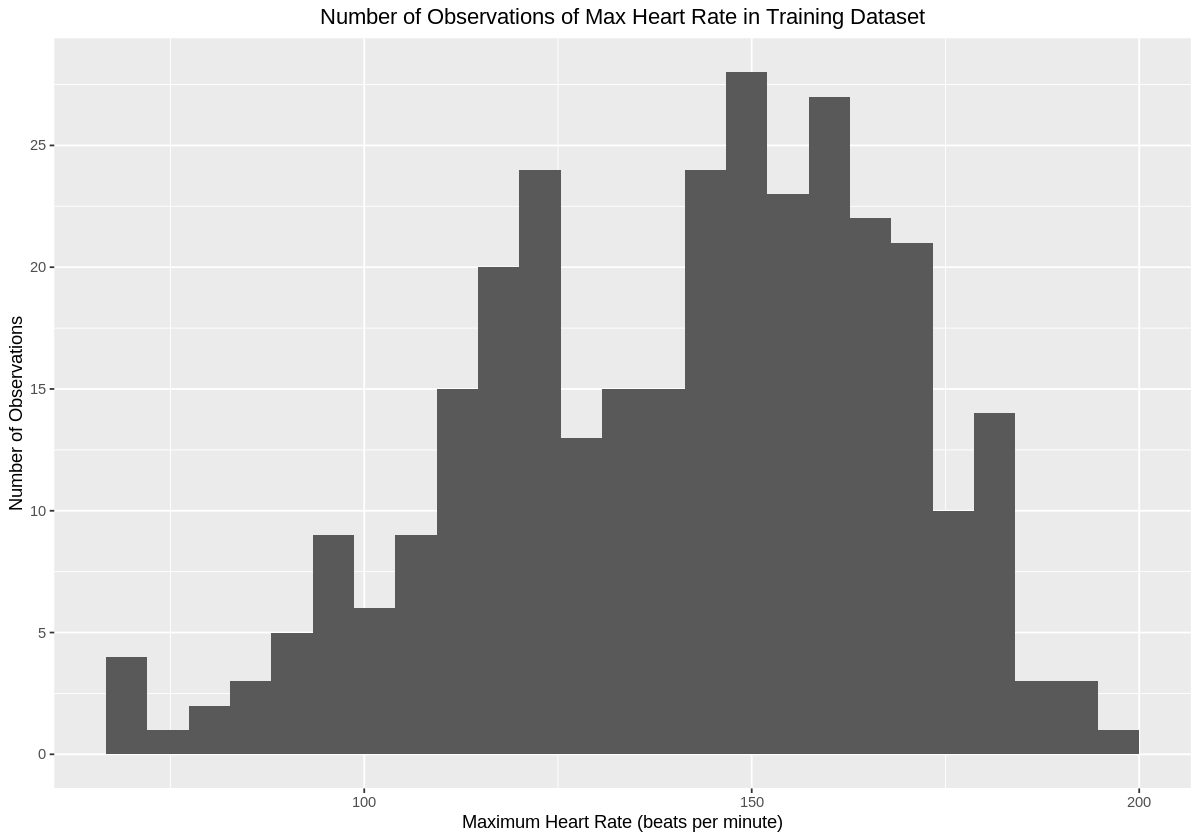

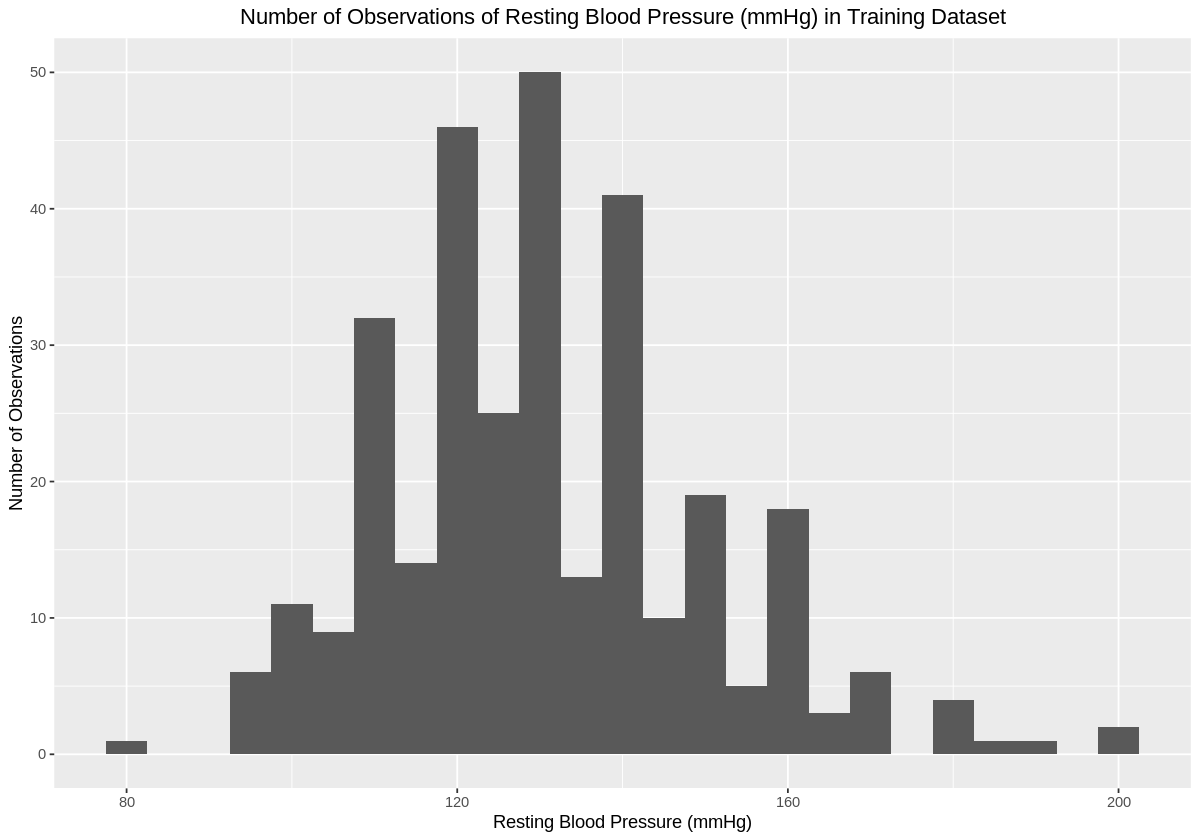

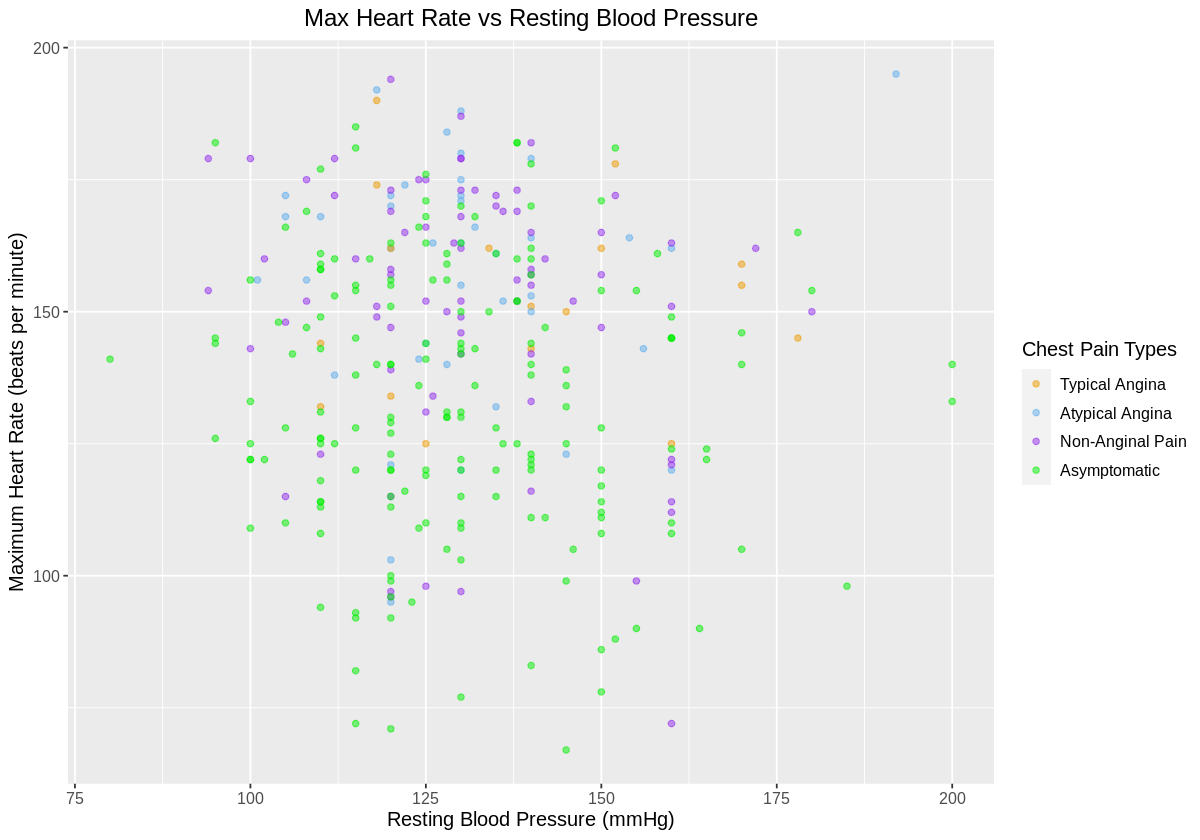

In [97]:
thalach_hist
trestbps_hist
heart_plot

### Expected outcomes and significance

In this project, we will create classifiers that, given a testing set with the predictors of resting blood pressure and maximum achieved heart rate, can predict chest pain type with adequate accuracy. In this process, we also expect to determine whether or not high blood pressure and serum cholesterol have a connection to different types of chest pain.

If we predict which cp type an individual will have based on rbp and serum cholesterol, we could recommend treatment and lifestyle changes corresponding to their cp type before conditions worsens. The four chespains are associated with different severities and treatments. The sooner these cp type are detected and treated, the less risk of patient developing heart disease.

Another question our data analysis lead to is treatment or medication for different types of heart disease. If we predict which cp type someone is susceptible to, then we can analyze how different medications, exercise habits, or changing their diet improve their health could prove beneficial at creating better treatment to heart disease across the world, using data collected relating the health of the individual.

### Building our classifier

In [98]:
set.seed(1)
# Creating our recipe and scaling, centering, and balancing our predictors
heart_disease_recipe <- recipe(cp ~ thalach + trestbps, data = heart_disease_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) |>
    step_upsample(cp, over_ratio = 1)

In [99]:
heart_disease_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()
Up-sampling based on cp

In [100]:
set.seed(1)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
    set_engine("kknn") |> 
    set_mode("classification")

In [101]:
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [104]:
set.seed(1)
#Perform 5-fold cross-validation to choose best k
hd_vfold <- vfold_cv(heart_disease_train, v = 5, strata = cp)
gridvals <- tibble(neighbors = seq(1,30))

hd_results <- workflow() |> 
    add_recipe(heart_disease_recipe) |> 
    add_model(knn_spec)|> 
    tune_grid(resamples = hd_vfold, grid = gridvals) |> 
    collect_metrics() |>
    filter(.metric == "accuracy")

best_estimated_accuracy <- hd_results |> 
    select(neighbors,.metric,mean)|>
    arrange(desc(mean))|>
    head(5)
best_estimated_accuracy

neighbors,.metric,mean
<int>,<chr>,<dbl>
2,accuracy,0.4984538
1,accuracy,0.4921046
3,accuracy,0.3947133
4,accuracy,0.3883641
5,accuracy,0.3444080


In [105]:
Best_k<- best_estimated_accuracy|>
    select(neighbors:mean)|>
    summarise(max(mean))|>
    pull()
Best_k

[1] 0.4984538

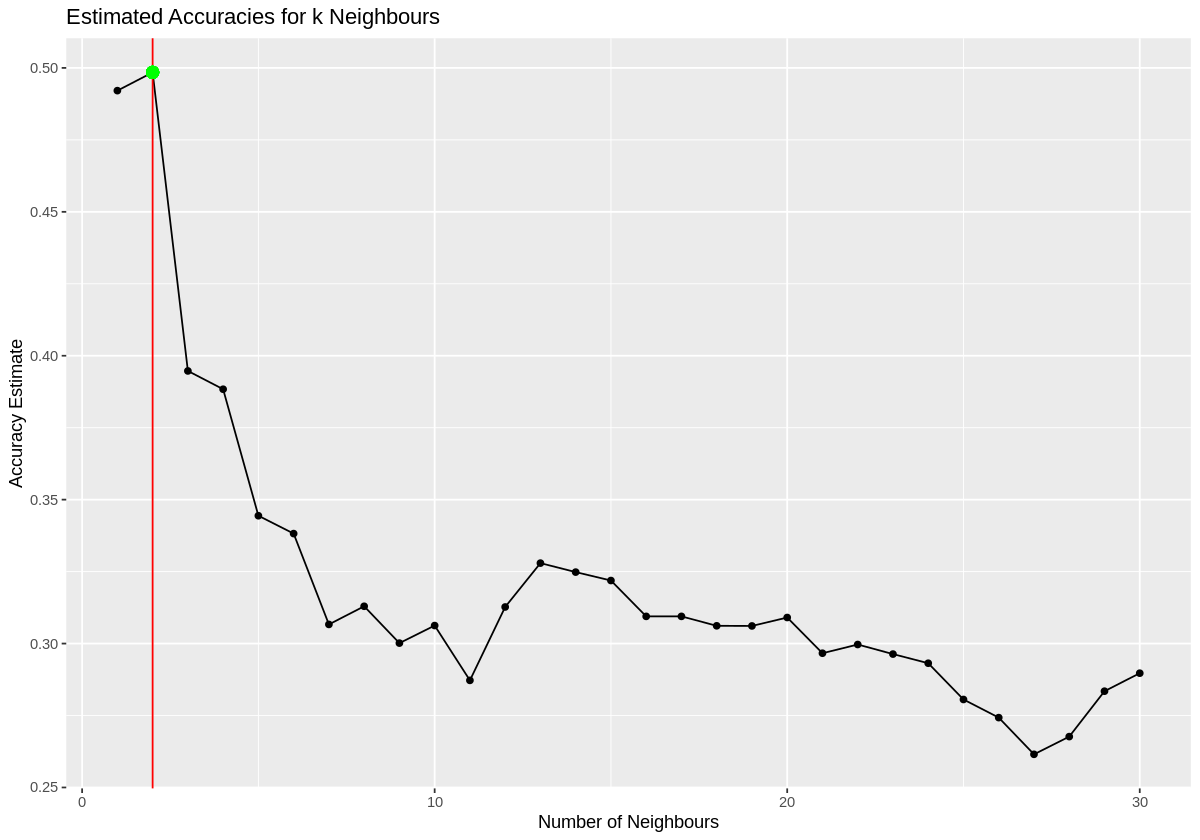

In [106]:
# plot out and look at which value of k is the best 

cross_val_plot <- hd_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    geom_vline(xintercept = 2, colour = "red") +
    geom_point(aes(x = 2, y = Best_k), size = 3, colour = "green") +
    labs(x = "Number of Neighbours", y = "Accuracy Estimate", title = "Estimated Accuracies for k Neighbours")
cross_val_plot  

### KNN Classification

In [107]:
set.seed(1)
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) %>% 
    set_engine("kknn") %>% 
    set_mode("classification")

heart_disease_fit <- workflow() %>%
  add_recipe(heart_disease_recipe) %>%
  add_model(knn_best_spec) %>%
  fit(data = heart_disease_train)

heart_disease_predictions <- predict(heart_disease_fit, heart_disease_test) |>
    bind_cols(heart_disease_test)

heart_disease_accuracy <- heart_disease_predictions %>% 
    metrics(truth = cp, estimate = .pred_class) %>% 
    select(.metric, .estimate) %>% 
    head(1)
heart_disease_accuracy

.metric,.estimate
<chr>,<dbl>
accuracy,0.4205607


### Confusion Matrix 

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



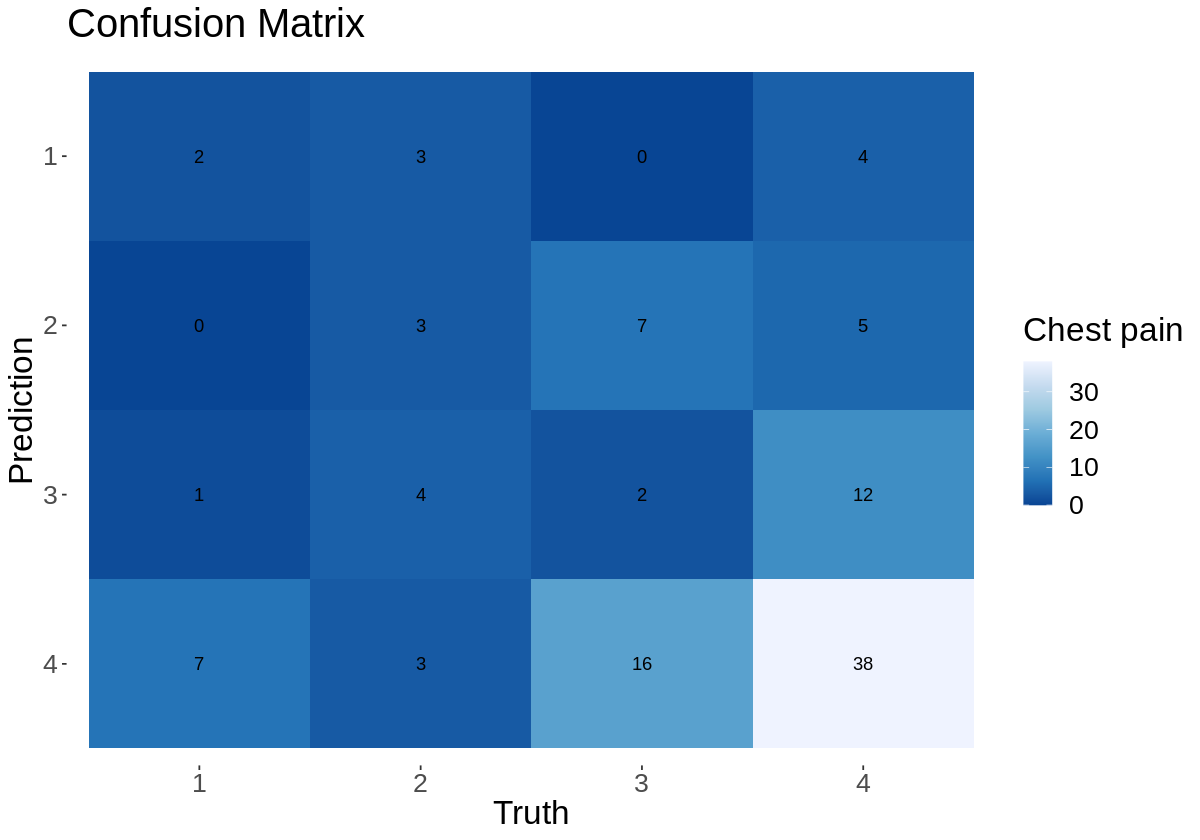

In [108]:
hd_cm <- heart_disease_predictions %>% 
    conf_mat(truth = cp, estimate = .pred_class)

autoplot(hd_cm, type = "heatmap") +
    scale_fill_distiller(name = "Chest pain") + 
    labs(title = "Confusion Matrix") +
    theme(legend.position = "right", text = element_text(size = 20),
          plot.caption = element_text(size = 20, hjust = 0))

Our accurices are very low due to a lot of indeterminate factors. Since there are 4 type of classifiers instead of the 2 type we normally see in a knn classification algrithom. Also some of our data are incomplete, there was a lot of NA in our data sheet that we have to remove, which made our data incompelete at time.

### Discussion

As our analysis above, the accuracies are low. Even though we combine two dataset to create a large size. The reasons why the accuracies are low, it is becuase there are four types of chest pain in the dataset, too many types under our class which can lead to a lot of variable that decrease the accuracy. 

## Citations

   
Canadian Chronic Disease Surveillance System (CCDSS). (2017). https://health-infobase.canada.ca/ccdss/data-tool/Index?G=00 

UCI Machine Learning Repository: Heart Disease Data Set. (1988). https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Wikimedia Foundation. (2022, November 14). Angina. Wikipedia. Retrieved December 3, 2022, from https://en.wikipedia.org/wiki/Angina#/media/File:A_man_having_a_Heart_Attack.png 